In [ ]:
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

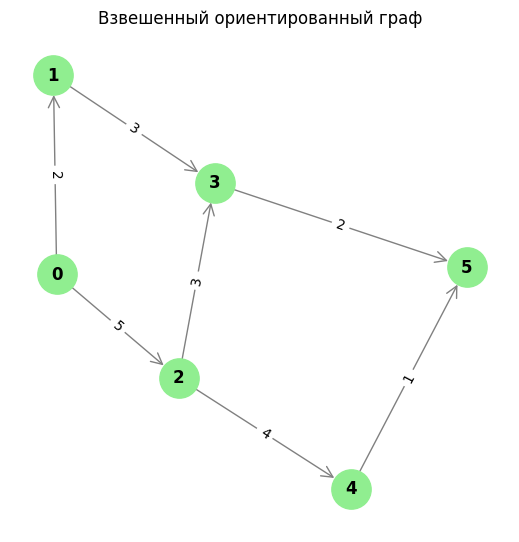

In [ ]:
%matplotlib inline

# Данные графа
graph_edges = [
    (0, 1, 2), (0, 2, 5),
    (1, 3, 3),
    (2, 3, 3), (2, 4, 4),
    (3, 5, 2),
    (4, 5, 1)
]

G = nx.DiGraph()
G.add_weighted_edges_from(graph_edges)

# Визуализация
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=800,
    font_size=12,
    font_weight='bold',
    edge_color='gray',
    arrows=True,
    arrowsize=20,
    arrowstyle='->'
)

# Добавляем веса
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Взвешенный ориентированный граф")
plt.show()

In [ ]:
[(0, 1, 2), (0, 2, 5), (1, 3, 3), (2, 4, 4), (3, 5, 2)]

In [ ]:
graph = {}
vertices = set()
for edge in graph_edges:
  u, v, w = edge
  vertices = vertices.union(set([u, v]))
  if u not in graph:
    graph[u] = [(v, w)]
  else:
    graph[u].append((v, w))
not_included = vertices.difference(set(graph.keys()))
for u in not_included:
  graph[u] = []
graph

{0: [(1, 2), (2, 5)],
 1: [(3, 3)],
 2: [(3, 3), (4, 4)],
 3: [(5, 2)],
 4: [(5, 1)],
 5: []}

1. Алгоритм Дейкстры

In [ ]:
import heapq

INF = 10 ** 9

def dijkstra(graph, start):
    n = len(graph)
    dist = [INF] * n
    dist[start] = 0
    prev = [-1] * n
    pq = []
    heapq.heappush(pq, (0, start))

    while(len(pq) > 0):
      d, u = heapq.heappop(pq)
      if d > dist[u]:
        continue
      for v, w in graph[u]:
        new_dist = dist[u] + w
        if new_dist < dist[v]:
          dist[v] = new_dist
          prev[v] = u
          heapq.heappush(pq, (new_dist, v))

    return dist, prev

def reconstruct_path(prev, target):
  path = []
  cur = target
  while  cur != -1:
    path.append(cur)
    cur = prev[cur]
  path.reverse()
  return path

Тестирование алгоритма

In [ ]:
start_vertex = 0
dist, prev = dijkstra(graph, start_vertex)

print("Расстояния от вершины", start_vertex)
for i in range(len(dist)):
   print(f"До вершины {i}: {dist[i]}")

print("\nПути:")
for i in range(len(dist)):
  if dist[i] != INF:  # Если путь существует
    path = reconstruct_path(prev, i)
    print(f"В {i}: {path} (расстояние: {dist[i]})")
  else:
    print(f"В {i}: нет пути")

Расстояния от вершины 0
До вершины 0: 0
До вершины 1: 2
До вершины 2: 5
До вершины 3: 5
До вершины 4: 9
До вершины 5: 7

Пути:
В 0: [0] (расстояние: 0)
В 1: [0, 1] (расстояние: 2)
В 2: [0, 2] (расстояние: 5)
В 3: [0, 1, 3] (расстояние: 5)
В 4: [0, 2, 4] (расстояние: 9)
В 5: [0, 1, 3, 5] (расстояние: 7)


2. Алгоритм Беллмана — Форда

In [ ]:
'''def bellmanFord(n, graph_edges, start):
    dist = [INF] * n
    dist[start] = 0
    prev = [-1] * n

    for i in range(1, n):
      for u, v, w in graph_edges:
        if dist[u]!= INF and dist[u] + w < dist[v]:
           dist[v] = dist[u] + w
           prev[v] = u
    for u, v, w in graph_edges:
      if dist[u]!= INF and dist[u] + w < dist[v]:
        return None

    return dist, prev'''
def bellmanFord(n, graph_edges, start):
    dist = [INF] * n
    prev = [-1] * n
    dist[start] = 0

    for i in range(1, n):
      for edge in graph_edges:
        u, v, w = edge
        if dist[u] != INF and dist[u] + w < dist[v]:
          dist[v] = dist[u] + w
          prev[v] = u

    for u, v, w in graph_edges:
      if dist[u] != INF and dist[u] + w < dist[v]:
        return None # Граф содержит отрицательный цикл

    return dist, prev



In [ ]:
start_vertex = 0
dist, prev = bellmanFord(len(graph), graph_edges, start_vertex)

print("Расстояния от вершины", start_vertex)
for i in range(len(dist)):
   print(f"До вершины {i}: {dist[i]}")

print("\nПути:")
for i in range(len(dist)):
  if dist[i] != INF:  # Если путь существует
    path = reconstruct_path(prev, i)
    print(f"В {i}: {path} (расстояние: {dist[i]})")
  else:
    print(f"В {i}: нет пути")

Расстояния от вершины 0
До вершины 0: 0
До вершины 1: 2
До вершины 2: 5
До вершины 3: 5
До вершины 4: 9
До вершины 5: 7

Пути:
В 0: [0] (расстояние: 0)
В 1: [0, 1] (расстояние: 2)
В 2: [0, 2] (расстояние: 5)
В 3: [0, 1, 3] (расстояние: 5)
В 4: [0, 2, 4] (расстояние: 9)
В 5: [0, 1, 3, 5] (расстояние: 7)


3. Алгоритм Флойда — Уоршелла

In [ ]:
import numpy as np
def floydWarshall(graph):
  n = len(graph)
  dist = np.full((n, n), INF, np.int32)
  next = np.full((n, n), -1, np.int32)
  for u in graph:
    dist[u][u] = 0
    next[u][u] = u
    for v, w in graph[u]:
      dist[u][v] = w
      next[u][v] = v
  for k in range(n):
    for i in range(n):
      for j in range(n):
        if dist[i][k] != INF and dist[k][j]!=INF and dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]
          next[i][j] = next[i][k]
  return dist, next

In [ ]:
# Восстановление пути
def reconstruct_path(i, j, next):
  if next[i][j]==-1:
    return None
  path = [i]
  while(i!=j):
    i = next[i][j]
    path.append(i)
  return path

In [ ]:
dist, next = floydWarshall(graph)
print(dist)

for i in range(len(graph)):
  for j in range(len(graph)):
    path = reconstruct_path(i, j, next)
    if path is not None:
      print(f"Путь из {i} в {j}: {path} расстояние {dist[i][j]}")

[[         0          2          5          5          9          7]
 [1000000000          0 1000000000          3 1000000000          5]
 [1000000000 1000000000          0          3          4          5]
 [1000000000 1000000000 1000000000          0 1000000000          2]
 [1000000000 1000000000 1000000000 1000000000          0          1]
 [1000000000 1000000000 1000000000 1000000000 1000000000          0]]
Путь из 0 в 0: [0] расстояние 0
Путь из 0 в 1: [0, np.int32(1)] расстояние 2
Путь из 0 в 2: [0, np.int32(2)] расстояние 5
Путь из 0 в 3: [0, np.int32(1), np.int32(3)] расстояние 5
Путь из 0 в 4: [0, np.int32(2), np.int32(4)] расстояние 9
Путь из 0 в 5: [0, np.int32(1), np.int32(3), np.int32(5)] расстояние 7
Путь из 1 в 1: [1] расстояние 0
Путь из 1 в 3: [1, np.int32(3)] расстояние 3
Путь из 1 в 5: [1, np.int32(3), np.int32(5)] расстояние 5
Путь из 2 в 2: [2] расстояние 0
Путь из 2 в 3: [2, np.int32(3)] расстояние 3
Путь из 2 в 4: [2, np.int32(4)] расстояние 4
Путь из 2 в 5: [2, 

In [ ]:
print(dist)

[[         0          2          5          5          9          7]
 [1000000000          0 1000000000          3 1000000000          5]
 [1000000000 1000000000          0          3          4          5]
 [1000000000 1000000000 1000000000          0 1000000000          2]
 [1000000000 1000000000 1000000000 1000000000          0          1]
 [1000000000 1000000000 1000000000 1000000000 1000000000          0]]


4. Алгоритм Прима

In [ ]:
import heapq
def primPQ(graph):
    n = len(graph)
    dist = [INF] * n
    visited = [False] * n
    parent = [-1] * n
    pq = []

    dist[0] = 0
    heapq.heappush(pq, (0, 0))
    totalWeight = 0

    while len(pq) > 0:
      w, u = heapq.heappop(pq)
      if visited[u]:
        continue
      visited[u] = True
      totalWeight += w

      for v, weight in graph[u]:
        if not visited[v] and weight < dist[v]:
          dist[v] = weight
          parent[v] = u
          heapq.heappush(pq, (weight, v))

    mst = []
    for i in range(n):
      if (parent[i] >= 0):
        for u, w in graph[parent[i]]:
          if u == i:
            weight = w
            break
        mst.append((parent[i], i, weight))
    return totalWeight, mst

In [ ]:
tw, mst = primPQ(graph)
tw, mst

(16, [(0, 1, 2), (0, 2, 5), (1, 3, 3), (2, 4, 4), (3, 5, 2)])

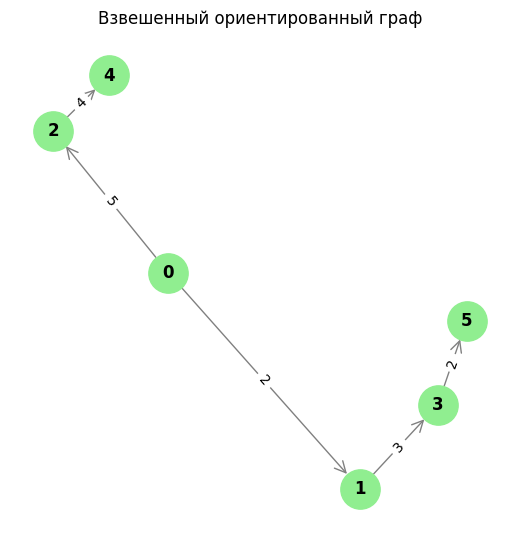

In [ ]:
G = nx.DiGraph()
G.add_weighted_edges_from(mst)

# Визуализация
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)

nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=800,
    font_size=12,
    font_weight='bold',
    edge_color='gray',
    arrows=True,
    arrowsize=20,
    arrowstyle='->'
)

# Добавляем веса
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Взвешенный ориентированный граф")
plt.show()